<a href="https://colab.research.google.com/github/DuaneHsa/2022_ML_Earth_Env_Sci/blob/main/final_project_renaud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import preprocessing
from sklearn.cluster import KMeans as KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

from mpl_toolkits.mplot3d import axes3d 


from google.colab import drive


In [2]:
drive.mount('/content/drive')
!ls /content/drive/
df = pd.read_csv('/content/drive/MyDrive/01_UNIL/00_COURS_UNIL/Machine_Learning/ML_project/Plume_reno.csv',header=0)
pd.set_option('precision', 2)

Mounted at /content/drive
MyDrive  Othercomputers


In [3]:
#df1 = df.pivot(index='time', columns='pol', values='conc')
#pol_name = df['pol'].unique() # unique polutant name vector
#pol_name.sort()
#np.wide_to_long(df,['P'], i = ['time','loc','z'], j ='C')  # P is new polutant column,  and C is new concentration column. (but not working...)
#df['time'] = df['time'].astype(str)+ df['loc'].astype(str)
#df['time'] = df['time'].astype(int)
#df.drop('loc', inplace=True, axis=1)
#df = df.groupby((['time','pol']), as_index=False)['conc'].mean()
#(['col5','col2'])
#df['conc'].fillna(0, inplace=True)

In [4]:
# data arrangement
df['conc'].fillna(0, inplace=True)
df['pol'].replace({'Atenolol': 1, 'Atrazin': 2, 'Azithromycin':3,	'Benzotriazol':4,	'Bezafibrat':5,	'Carbamazepin':6, 'Carbendazim':7,	'Chloridazon':8,	'Ciprofloxacin':9,	'Clarithromycin':10,	'Clindamycin':11,	'Clofibric acid':12, 'Diclofenac':13, 'Diuron':14,	'Gabapentin':15,	'Gemfibrocil':16,	'Iopamidol':17,	'IPBC':18,	'Irgarol':19,	'Isoproturon':20, 'Ketoprofen':21,	'Mecoprop':22,	'Mefenamic acid':23,	'Methylbenzotriazol':24,	'Metoprolol':25,	'Metronidazol':26,	'Naproxen':27,	'Norfloxacin':28,	'Ofloxacin':29,	'Paracetamol':30,	'Primidon':31,'Propiconazol':32,	'Propranolol':33,	'Simvastatin':34,	'Sotalol':35,	'Sulfamethoxazol':36,	'Terbutryn':37,	'Trimethoprim':38}, inplace=True)
df['pol'] = df['pol'].astype(int)


In [5]:

#clustering  K-means
clusternumber = 5
km = KMeans(n_clusters=clusternumber,init='k-means++',max_iter=1000, random_state=42)
y_predicted = km.fit_predict(df)
df['cluster']=y_predicted
X = df.drop(['conc'], axis=1)
y = df['conc']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 2)



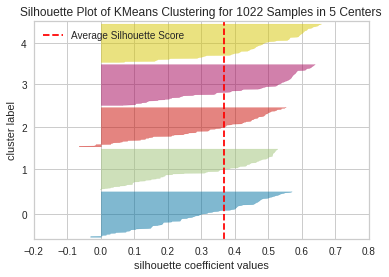

In [6]:

#  clustering model and visualizer
model = KMeans(clusternumber, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)  

visualizer.show() 

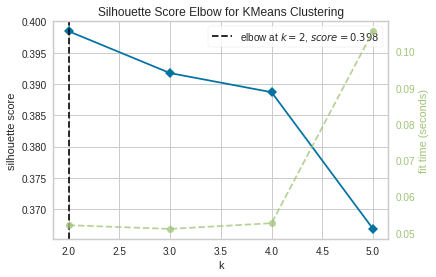

In [7]:
# number of cluster determination

#model = KMeans()

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,6),metric='silhouette', timings= True,method = 'wcss')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure





In [8]:
print(km.inertia_)


313619.7500214564


No handles with labels found to put in legend.


NameError: ignored

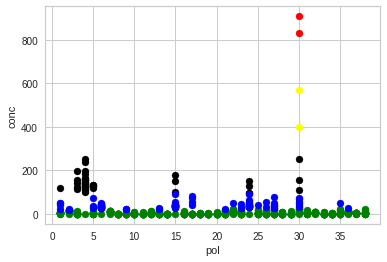

In [9]:

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]


plt.scatter(df1.pol,df1.conc,color='green')
plt.scatter(df2.pol,df2.conc,color='red')
plt.scatter(df3.pol,df3.conc,color='black')
plt.scatter(df4.pol,df4.conc,color='yellow')
plt.scatter(df5.pol,df5.conc,color='blue')


plt.xlabel('pol')
plt.ylabel('conc')
plt.legend()

ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])




In [ ]:
import matplotlib.pyplot as plt
plotcolor = ['red','orange','yellow','green','blue']
ax = plt.axes(projection='3d')
ax.scatter(df.pol,df.time,df.z, s = df.conc)

plt.show()

In [ ]:
 #DBSCAN part---------

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn import metrics



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/01_UNIL/00_COURS_UNIL/Machine_Learning/ML_project/Plume_reno.csv',header=0)
df['conc'].fillna(0, inplace=True)


X = df.drop(['conc',], axis=1)
y = df['conc']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 42)


X['pol'].replace({'Atenolol': 1, 'Atrazin': 2, 'Azithromycin':3,	'Benzotriazol':4,	'Bezafibrat':5,	'Carbamazepin':6, 'Carbendazim':7,	'Chloridazon':8,	'Ciprofloxacin':9,	'Clarithromycin':10,	'Clindamycin':11,	'Clofibric acid':12, 'Diclofenac':13, 'Diuron':14,	'Gabapentin':15,	'Gemfibrocil':16,	'Iopamidol':17,	'IPBC':18,	'Irgarol':19,	'Isoproturon':20, 'Ketoprofen':21,	'Mecoprop':22,	'Mefenamic acid':23,	'Methylbenzotriazol':24,	'Metoprolol':25,	'Metronidazol':26,	'Naproxen':27,	'Norfloxacin':28,	'Ofloxacin':29,	'Paracetamol':30,	'Primidon':31,'Propiconazol':32,	'Propranolol':33,	'Simvastatin':34,	'Sotalol':35,	'Sulfamethoxazol':36,	'Terbutryn':37,	'Trimethoprim':38}, inplace=True)
X['pol'] = X['pol'].astype(float)
  




# Scaling the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  
# Normalizing the data s
X_normalized = normalize(X_scaled)
  
#np to panda
X_normalized = pd.DataFrame(X_normalized)
 

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

# Numpy array of all the cluster labels assigned to each data point
db= DBSCAN(eps = 0.09, min_samples = 20).fit(X_principal)
labels = db.labels_
labels_true = df['conc']


core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]


for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 0.4]



    class_member_mask = labels == k

    xy = X_normalized[class_member_mask & core_samples_mask]
    plt.plot(
        xy,
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor='k',
        markersize=8,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()